In [1]:
import pandas as pd
import numpy as np
import lifelines as ll
import sksurv as sks
import matplotlib.pyplot as plt
from bart_survival import surv_bart as sb


import lifelines as ll
from lifelines import KaplanMeierFitter
import subprocess
import threading as th
import multiprocessing as mp
import sys
sys.path.append("../src/")
sys.path.append("../py/")
import _functions1 as fn
import _conditions2 as cn
import _plot_fx as pltf
import _param2 as prm
import sim_adj as sm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import importlib
importlib.reload(fn)

<module '_functions1' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_functions1.py'>

In [3]:
complex_3 = {
    "type": "Complex, continuous, 20% cens",
    "x_vars": 7, 
    "VAR_CLASS": [2,2,1,1,1,1],
    "VAR_PROB":[.4,.6,None,None,None,None],
    "scale_f" :     "3+ \
                    (4 * x_mat[:,0]) +\
                    (2 * x_mat[:,1]) +\
                    (2 * (x_mat[:,1] * .5*x_mat[:,2])) +\
                    .5 * np.power((x_mat[:,3] +1), 2)",
    # "scale_f" : "np.exp(3 + 0.5*np.sin(np.pi * x_mat[:,0] * x_mat[:,1]) + np.power((x_mat[:,2]-0.5), 2) + 0.5* x_mat[:,3] + 0.25 * x_mat[:,4])",
    # "scale_f": "20 + 5*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + x_mat[:,3] + x_mat[:,4] + x_mat[:,5] + 10*x_mat[:,6])",
    "shape_f":      "2",
    "shape_f":      "1.6 + 3 * x_mat[:,0]",
    "cens_scale":None
}

In [4]:
x_mat, event_dict, sv_true = fn.sim_3s(
    seed=20,
 	n = 1000,
	scenario = complex_3,
	SPLIT_RULES = prm.SPLIT_RULES3,
	model_dict = prm.MODEL_DICT3,
	sampler_dict = prm.SAMPLER_DICT3
)

mean shape 2.8000000000000007
mean scale 7.2346557725
23.0
mean time draws 6.457748514466934


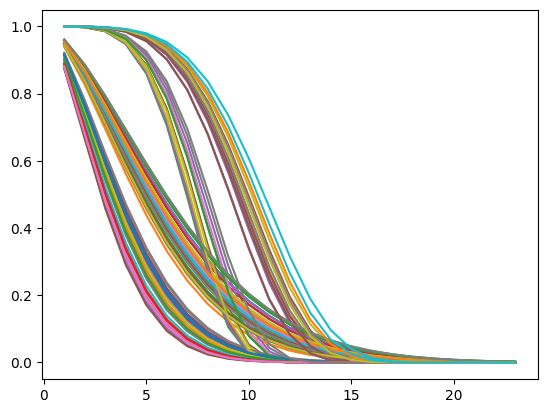

In [5]:
for i in range(100):
	plt.plot(sv_true["true_times"], sv_true["sv_true"][i,:])
 	# plt.plot(sv_true["true_times"], sv_true["hz_true"][i,:])

In [580]:
x_mat.shape

(1000, 7)

In [114]:
rr = []
hr = []
dd = []

for i in range(7):
    x_mat0 = x_mat.copy()
    x_mat0[:,i] = 0
    x_mat1 = x_mat.copy()
    x_mat1[:,i] = 1

    hz0 = sm.simulate_survival(
        x_mat0, 
        scale_f = complex_3["scale_f"],
        shape_f = complex_3["shape_f"],
        cens_scale= complex_3["cens_scale"],
        true_only=True
        )
    hz1 = sm.simulate_survival(
        x_mat1, 
        scale_f = complex_3["scale_f"],
        shape_f = complex_3["shape_f"],
        cens_scale= complex_3["cens_scale"],
        true_only=True
        )


    # hzss = hz1[0]["hz_true"][:,:10].mean(0)/hz0[0]["hz_true"][:,:10].mean(0)
    hzss = (hz1[0]["hz_true"][:,:12]/hz0[0]["hz_true"][:,:12]).mean(0)
    diff = (hz1[0]["sv_true"][:,:12] - hz0[0]["sv_true"][:,:12]).mean(0)
    dd.append(diff)
    rr.append(hzss) 
    print(hzss)
    hr.append(hzss.mean())
    print(hzss.mean())

mean shape 1.6000000000000003
mean scale 5.6346557725
23.0
mean shape 4.6
mean scale 9.634655772500002
18.0
[1.40029893e-03 1.12023915e-02 3.78080712e-02 8.96191317e-02
 1.75037367e-01 3.02464570e-01 4.80302534e-01 7.16953054e-01
 1.02081792e+00 1.40029893e+00 1.86379788e+00 2.41971656e+00]
0.7099515590288116
mean shape 2.8000000000000007
mean scale 5.7588967725
15.0
mean shape 2.8000000000000007
mean scale 8.247997772500002
23.0
[0.4022098 0.4022098 0.4022098 0.4022098 0.4022098 0.4022098 0.4022098
 0.4022098 0.4022098 0.4022098 0.4022098 0.4022098]
0.402209804157575
mean shape 2.8000000000000007
mean scale 6.9448967725
20.0
mean shape 2.8000000000000007
mean scale 7.5378967725
23.0
[0.8399929 0.8399929 0.8399929 0.8399929 0.8399929 0.8399929 0.8399929
 0.8399929 0.8399929 0.8399929 0.8399929 0.8399929]
0.8399928979895149
mean shape 2.8000000000000007
mean scale 6.575759
19.0
mean shape 2.8000000000000007
mean scale 8.075759
23.0
[0.58158205 0.58158205 0.58158205 0.58158205 0.58158205

In [115]:
print(rr)
print(hr)
print(dd)

[array([1.40029893e-03, 1.12023915e-02, 3.78080712e-02, 8.96191317e-02,
       1.75037367e-01, 3.02464570e-01, 4.80302534e-01, 7.16953054e-01,
       1.02081792e+00, 1.40029893e+00, 1.86379788e+00, 2.41971656e+00]), array([0.4022098, 0.4022098, 0.4022098, 0.4022098, 0.4022098, 0.4022098,
       0.4022098, 0.4022098, 0.4022098, 0.4022098, 0.4022098, 0.4022098]), array([0.8399929, 0.8399929, 0.8399929, 0.8399929, 0.8399929, 0.8399929,
       0.8399929, 0.8399929, 0.8399929, 0.8399929, 0.8399929, 0.8399929]), array([0.58158205, 0.58158205, 0.58158205, 0.58158205, 0.58158205,
       0.58158205, 0.58158205, 0.58158205, 0.58158205, 0.58158205,
       0.58158205, 0.58158205]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]
[0.7099515590288116, 0.402209804157575, 0.8399928979895149, 0.5815820459473794, 1.0, 1.0, 1.0]
[array([0.0682409 , 0.19000554, 0.3230657 , 0.44028387,

In [116]:
rr

[array([1.40029893e-03, 1.12023915e-02, 3.78080712e-02, 8.96191317e-02,
        1.75037367e-01, 3.02464570e-01, 4.80302534e-01, 7.16953054e-01,
        1.02081792e+00, 1.40029893e+00, 1.86379788e+00, 2.41971656e+00]),
 array([0.4022098, 0.4022098, 0.4022098, 0.4022098, 0.4022098, 0.4022098,
        0.4022098, 0.4022098, 0.4022098, 0.4022098, 0.4022098, 0.4022098]),
 array([0.8399929, 0.8399929, 0.8399929, 0.8399929, 0.8399929, 0.8399929,
        0.8399929, 0.8399929, 0.8399929, 0.8399929, 0.8399929, 0.8399929]),
 array([0.58158205, 0.58158205, 0.58158205, 0.58158205, 0.58158205,
        0.58158205, 0.58158205, 0.58158205, 0.58158205, 0.58158205,
        0.58158205, 0.58158205]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

# CPH

In [8]:
import lifelines
cph_df = np.hstack([event_dict["t_event"], event_dict["status"], x_mat])
cph_df = pd.DataFrame(cph_df, columns = ["t", "s", "x0", "x1", "x2", "x3", "x4","x5","x6"])
cph_df
cph = lifelines.CoxPHFitter()
cph.fit(cph_df, "t", "s")
cph.print_summary()
cph_sv = cph.predict_survival_function(cph_df).to_numpy().T

<lifelines.CoxPHFitter: fitted with 1000 total observations, 0 right-censored observations>
             duration col = 't'
                event col = 's'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 1000
   partial log-likelihood = -5748.39
         time fit was run = 2024-03-18 14:29:14 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
x0        -0.94      0.39      0.07           -1.07           -0.80                0.34                0.45
x1        -0.90      0.41      0.07           -1.04           -0.76                0.35                0.47
x2        -0.08      0.92      0.11           -0.29            0.14                0.75                1.15
x3        -0.43      0.65      0.12           -0.66           -0.21                0.52                0.81
x4        -0.07      0.94      0.11           -0.29            0.16                0.75                1.17
x5         0.01      1.01      0.11           -0.20            0.22                0.82                1.25
x6        -0.02      0.98      0.11           -0.23            0.19                0.79                1.21

           cmp to      z      p  -log2(p)
covariate                                
x0           0.00 -13.92 <0.005    143.81
x1           0.00 -12.76 <0.005    121.47
x2           0.00  -0.72   0.47      1.08
x3           0.00  -3.76 <0.005     12.54
x4           0.00  -0.58   0.56      0.83
x5           0.00   0.10   0.92      0.12
x6           0.00  -0.20   0.84      0.25
---
Concordance = 0.71
Partial AIC = 11510.78
log-likelihood ratio test = 327.48 on 7 df
-log2(p) of ll-ratio test = 219.55

In [20]:
cph_ddl = []
for i in range(7):
	x_mat0 = x_mat.copy()
	x_mat0[:,i] = 0
	x_mat1 = x_mat.copy()
	x_mat1[:,i] = 1
	cph_df = np.hstack([event_dict["t_event"], event_dict["status"], x_mat0])
	cph_df = pd.DataFrame(cph_df, columns = ["t", "s", "x0", "x1", "x2", "x3", "x4","x5","x6"])
	cph_sv0 = cph.predict_survival_function(cph_df).to_numpy().T
	cph_df = np.hstack([event_dict["t_event"], event_dict["status"], x_mat1])
	cph_df = pd.DataFrame(cph_df, columns = ["t", "s", "x0", "x1", "x2", "x3", "x4","x5","x6"])
	cph_sv1 = cph.predict_survival_function(cph_df).to_numpy().T
	cph_dd = (cph_sv1[:,:12]-cph_sv0[:,:12]).mean(0)
	cph_ddl.append(cph_dd)

In [22]:
cph_ddl

[array([0.0307305 , 0.08638163, 0.14966701, 0.19809023, 0.23645106,
        0.27407769, 0.2964732 , 0.30089021, 0.28607303, 0.25534882,
        0.21854947, 0.16917418]),
 array([0.0349709 , 0.09706317, 0.1651095 , 0.21443223, 0.25071849,
        0.28151611, 0.29270863, 0.28286611, 0.25374455, 0.21286145,
        0.17245265, 0.12595509]),
 array([0.00297712, 0.00818252, 0.01376087, 0.01771974, 0.02059602,
        0.02305921, 0.02410716, 0.02372103, 0.0220083 , 0.01933606,
        0.01642298, 0.01271254]),
 array([0.0164128 , 0.04507512, 0.07573102, 0.09743612, 0.11316547,
        0.1265828 , 0.13222587, 0.13001676, 0.12056442, 0.10589722,
        0.08996316, 0.06974142]),
 array([0.00247204, 0.00679541, 0.01143029, 0.01472073, 0.0171118 ,
        0.01915891, 0.0200271 , 0.01969928, 0.01826552, 0.01603524,
        0.01361064, 0.01053168]),
 array([-0.00041593, -0.00114316, -0.00192245, -0.00247546, -0.00287715,
        -0.00322095, -0.00336678, -0.00331193, -0.0030715 , -0.00269711,
    

In [23]:
dd

[array([0.0682409 , 0.19000554, 0.3230657 , 0.44028387, 0.52058462,
        0.54835407, 0.51717135, 0.43551371, 0.32675052, 0.21796593,
        0.12678759, 0.05976478]),
 array([0.03068865, 0.07985175, 0.12574421, 0.16140913, 0.18937139,
        0.21602574, 0.24386216, 0.26499148, 0.26362256, 0.23022491,
        0.17337984, 0.11338294]),
 array([0.00401777, 0.01105061, 0.01865773, 0.02574605, 0.0321184 ,
        0.0382185 , 0.04465256, 0.05146194, 0.05740886, 0.05993917,
        0.05648962, 0.04669572]),
 array([0.0188184 , 0.04807954, 0.07414271, 0.09342584, 0.10833458,
        0.12290694, 0.13771112, 0.14716078, 0.14388452, 0.12730744,
        0.10401729, 0.07950384]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [14]:
dd

array([0.00081389, 0.00223688, 0.00376166, 0.00484355, 0.00562933,
       0.00630171, 0.00658668, 0.00647901, 0.00600824, 0.00527545,
       0.00447801, 0.00346427])

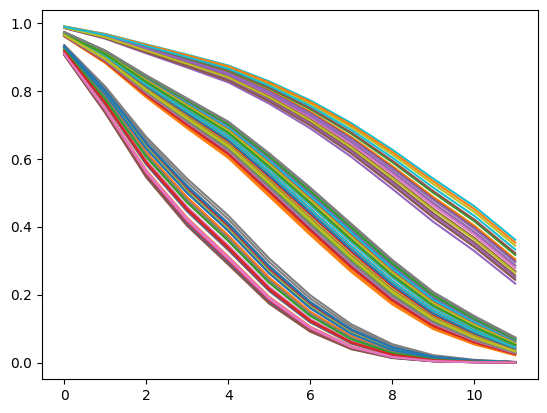

In [9]:
cph_sv.shape
for i in range(100):
    plt.plot(range(12), cph_sv[i,:12])

# BART

In [28]:
importlib.reload(prm)

<module '_param2' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_param2.py'>

In [26]:
np.unique(event_dict["t_event"])

ev_t2 = event_dict["t_event"].copy()
ev_s2 = event_dict["status"].copy()
msk = ev_t2 > 12
ev_t2[msk] = 12
ev_s2[msk] = 0
event_dict2 = event_dict.copy()
event_dict2["t_event"] = ev_t2
event_dict2["status"] = ev_s2

In [27]:
def get_py_bart_surv3(x_mat, event_dict, model_dict, sampler_dict, pdp = False):
    y_sk = sb.get_y_sklearn(status = event_dict["status"], t_event=event_dict["t_event"])
    trn = sb.get_surv_pre_train(y_sk = y_sk, x_sk = x_mat, weight=None)
    post_test = sb.get_posterior_test(y_sk = y_sk, x_test = x_mat)
    
    
    # return trn, post_test, small_post_x, small_coords
    BSM = sb.BartSurvModel(model_config=model_dict, sampler_config=sampler_dict)
    # fit with just the time column
    BSM.fit(y=trn["y"], X=trn["x"], weights=trn["w"], coords = trn["coord"], random_seed=99)
    post1 = BSM.sample_posterior_predictive(X_pred=post_test["post_x"], coords=post_test["coords"])
    sv_prob = sb.get_sv_prob(post1)
    uniq_t = BSM.uniq_times

    return sv_prob, uniq_t, BSM

In [69]:
SPLIT_RULES3 =  [
    "pmb.ContinuousSplitRule()", # time
    # "pmb.ContinuousSplitRule()", 
    "pmb.OneHotSplitRule()",
    "pmb.OneHotSplitRule()",
 	# "pmb.ContinuousSplitRule()",
  	"pmb.ContinuousSplitRule()",
  	"pmb.ContinuousSplitRule()",
	"pmb.ContinuousSplitRule()",
	"pmb.ContinuousSplitRule()",
	"pmb.ContinuousSplitRule()",
]
MODEL_DICT3 = {"trees": 60,
	"split_rules": SPLIT_RULES3
}
SAMPLER_DICT3 = {
	"draws": 300,
	"tune": 50,
	"cores": 5,
	"chains": 5,
	"compute_convergence_checks": False
}

In [70]:
sv_prob, uniq_t, BSM = get_py_bart_surv3(x_mat, event_dict2, model_dict=MODEL_DICT3, sampler_dict=SAMPLER_DICT3)

Only 300 samples in chain.
Multiprocess sampling (5 chains in 5 jobs)
PGBART: [f]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Sampling 5 chains for 50 tune and 300 draw iterations (250 + 1_500 draws total) took 71 seconds.
Sampling: [f]


In [72]:
y_sk = sb.get_y_sklearn(status= event_dict2["status"], t_event=event_dict2["t_event"])
HR_L = []
HR_L_long = []
b_dd_l = []
val_list = [[0,1], [0,1], [0,1], [0,1], [0,1], [0,1], [0,1]]
var_names = ["X0", "X1", "X2", "X3", "X4", "X5", "X6"]

for i in range(7):
    # get the pdp evaluation
    pdp1 = sb.get_pdp(x_mat, var_col = [i], values = [val_list[i]], sample_n = None)
    pdp_tst = sb.get_posterior_test(y_sk, pdp1[0])
    pdp_post = BSM.sample_posterior_predictive(pdp_tst["post_x"], pdp_tst["coords"])
    pdp_sv_prob = sb.get_sv_prob(pdp_post)
    # create a mask to create ratio
    msk_1 = pdp1[1]["coord"] == 1
    # get RR over patietns (leaving draw and time dim)
    rr = (pdp_sv_prob["prob"].mean(0)[msk_1,:12] / pdp_sv_prob["prob"].mean(0)[~msk_1,:12])
    # sv diff
    b_dd = (pdp_sv_prob["sv"].mean(0)[msk_1,:12] - pdp_sv_prob["sv"].mean(0)[~msk_1, :12]).mean(0)
    b_dd_l.append(b_dd)
    # get RR over draws (leaving time dim)
    RR_M = rr.mean(0)
    # 95 CI over draws (leaving time dim)
    # RR_Q = np.round(np.quantile(rr, [0.025, 0.975], axis=0),3)
    # add to list, averaging over time
    HR_L.append((var_names[i], RR_M.mean()))
    # add to list, keep seperate times
    HR_L_long.append((var_names[i], RR_M))

Sampling: [f]


Sampling: [f]


Sampling: [f]


Sampling: [f]


Sampling: [f]


Sampling: [f]


Sampling: [f]


In [49]:
# HR_L
# HR_L_long
b_dd_l[0].shape

(12,)

Text(0, 0.5, 'Difference in SV Prob')

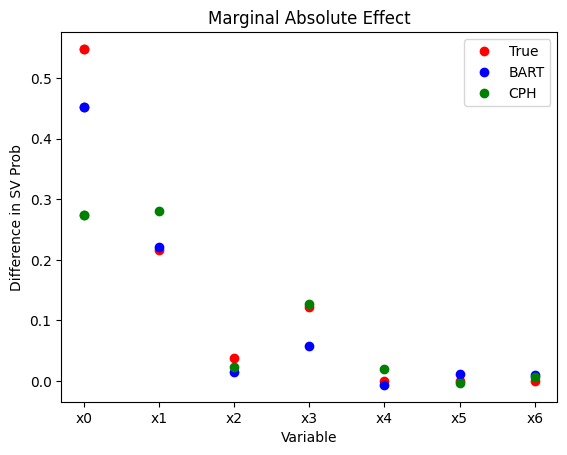

In [108]:
for i in range(7):
	if i == 0:
		plt.plot("x"+str(i), dd[i][5], "ro",label="True")
		plt.plot("x"+str(i), b_dd_l[i][5], "bo", label="BART")
		plt.plot("x"+str(i), cph_ddl[i][5], "go", label="CPH")
	plt.plot("x"+str(i), dd[i][5], "ro")
	plt.plot("x"+str(i), b_dd_l[i][5], "bo")
	plt.plot("x"+str(i), cph_ddl[i][5], "go")

plt.legend()
plt.title("Marginal Absolute Effect")
plt.xlabel("Variable")
plt.ylabel("Difference in SV Prob")

# plt.plot(12,dd[0][11], "ro")

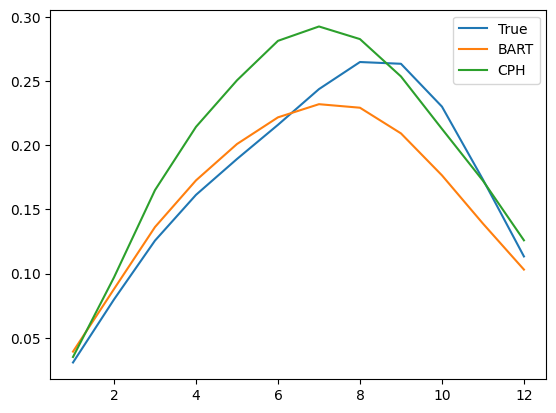

In [83]:

# plt.plot(range(1, 13), dd[0], label ="True")
# plt.plot(range(1, 13), b_dd_l[0], label="BART")
# plt.plot(range(1, 13), cph_ddl[0], label = "CPH")
i = 1
plt.plot(range(1, 13), dd[i], label ="True")
plt.plot(range(1, 13), b_dd_l[i], label="BART")
plt.plot(range(1, 13), cph_ddl[i], label = "CPH")
plt.legend()
# dd[0].shape
# cph_ddl[0].shape

In [110]:
HR_L

[('X0', 0.4131856330991501),
 ('X1', 0.5153199099265285),
 ('X2', 0.9612382841214101),
 ('X3', 0.826239563536875),
 ('X4', 1.0207241882881),
 ('X5', 0.9693122055359217),
 ('X6', 0.9778547359089235)]

In [113]:
rr

array([[0.95856887, 0.96127207, 0.96141025, ..., 0.99012136, 0.98861347,
        0.99191738],
       [0.95629519, 0.95976614, 0.95982079, ..., 0.98937897, 0.98889506,
        0.99198034],
       [0.95515738, 0.95926247, 0.96148135, ..., 0.98818566, 0.98762559,
        0.9910026 ],
       ...,
       [0.95491834, 0.95868086, 0.95928798, ..., 0.98715882, 0.98692284,
        0.99002415],
       [0.95303063, 0.95838193, 0.95981197, ..., 0.98788231, 0.98749406,
        0.99070175],
       [0.95933925, 0.95946187, 0.96037377, ..., 0.99022382, 0.9893815 ,
        0.99230695]])

Text(0, 0.5, 'SV Prob')

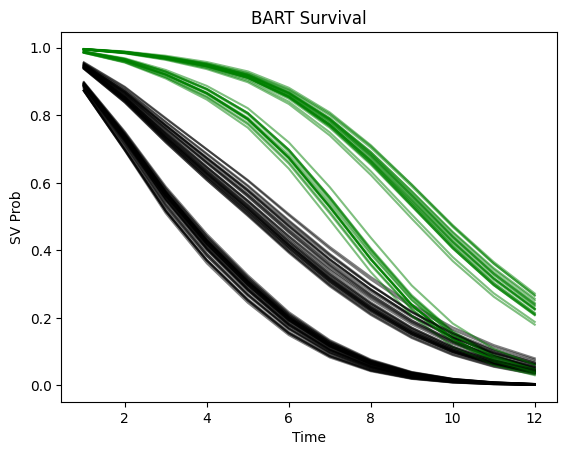

In [71]:
pb_sv = sv_prob["sv"].mean(0)
for i in range(100):
    if x_mat[i,0] == 0:
        color = "black"
    else:
        color = "green"
    plt.plot(uniq_t, pb_sv[i,:], color = color, alpha=0.5)
    
plt.title("BART Survival")
plt.xlabel("Time")
plt.ylabel("SV Prob")

Text(0, 0.5, 'SV Prob')

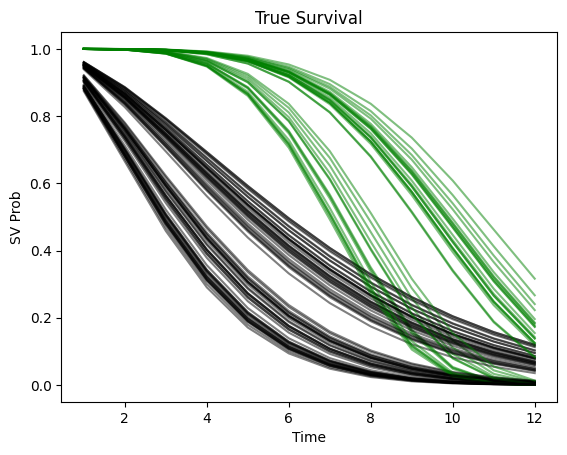

In [31]:
for i in range(100):
	if x_mat[i,0] == 0:
		color = "black"
	else:
		color = "green"
	plt.plot(uniq_t, sv_true["sv_true"][i,:12], color=color, alpha = 0.5)

plt.title("True Survival")
plt.xlabel("Time")
plt.ylabel("SV Prob")

Text(0, 0.5, 'SV Prob')

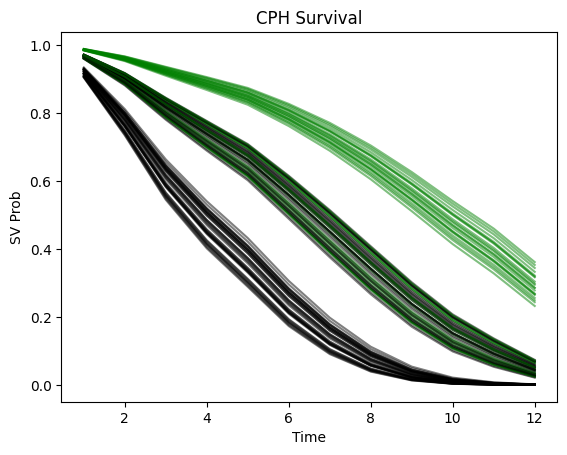

In [32]:
cph_sv.shape
for i in range(100):
	if x_mat[i,0] == 0:
		color = "black"
	else:
		color = "green"
	plt.plot(uniq_t, cph_sv[i,:12], color = color, alpha=0.5)
	
plt.title("CPH Survival")
plt.xlabel("Time")
plt.ylabel("SV Prob")

In [541]:
p_diff = (sv_true["sv_true"][:,:12] - pb_sv[:,:12])
c_diff = (sv_true["sv_true"][:,:12] - cph_sv[:,:12])


p_rmse = np.sqrt(np.power(p_diff, 2).mean(0))
c_rmse = np.sqrt(np.power(c_diff, 2).mean(0))
# print(c_diff.mean(0))

# print(p_diff.var(0))
# print(c_diff.var(0))
# uniq_t.shape

In [557]:
p_diff.max(0)
c_diff.max(0)

array([0.04111089, 0.11928646, 0.21069935, 0.26500945, 0.26530077,
       0.23308098, 0.19959487, 0.14638884, 0.11649475, 0.0726442 ,
       0.03933557, 0.05312553])

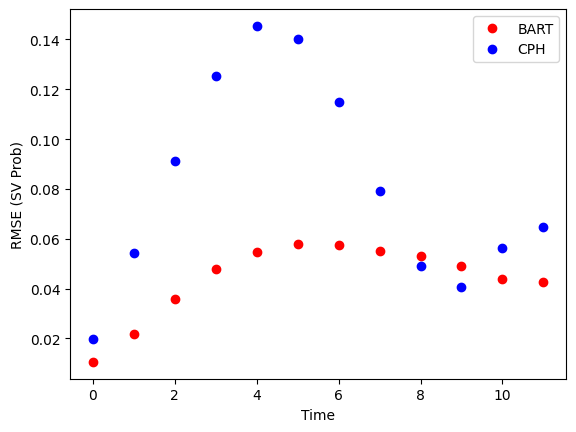

In [560]:
plt.plot(range(12), p_rmse, "ro", label = "BART")
plt.plot(range(12), c_rmse, "bo", label = "CPH")
# plt.plot(range(12), p_diff.max(0), "ro", alpha=0.5)
# plt.plot(range(12), c_diff.max(0), "bo", alpha=0.5)
plt.xlabel("Time")
plt.ylabel("RMSE (SV Prob)")
plt.legend()